In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as ply
import plotly.graph_objs as go

Define the "RP GP" kernel as follows:

$k_{RP}(x_1, x_2) = \sum_{j=1}^J \exp(-\frac{1}{2 l_j^2} ||P^{(j)} x_1 - P^{(j)} x_2||_2^2),$

where each $P^{(j)}$ is a $k \times d$ random projection matrix with elements sampled from $N(0,d)$. Hyerparameters of the kernel are the number of projections $J$, the size of projections $k$, and length scales $l_j$.


We have two sets of results: 
 * Both testing SE gp versus various versions of the "RP GP"
 * One is without fitting lengthscales, the other is with fitting lenght scales.

For we test each UCI dataset, we test a SE GP and RP GP with $k=1,4,10$ and $J=1,2,3,5,8,13,20$.

For each UCI dataset, for each model, we perform $10$-fold cross-validation to calculate a distribution of negative log likelihoods on held out data. 

When fitting hyperparameters, at most 1000 iterations of LBFGS with learning rate 0.1 (stopping early if train NMLL does not decrease by more than 1e-4 in 10 iterations. Since errors occur some times (due to numerical instability), 10 attempts are made per fold to train in this fashion without errors.

In [2]:
udf = pd.read_csv('./unfitted_rp_compare_ablation_results.csv')
fdf = pd.read_csv('./fitted_rp_compare_ablation_results.csv')

In [3]:
udf.head()

,Unnamed: 0,J,RP,d,dataset,error,fold,k,mse,n,repeat,test_nll,test_nmll,train_nll,train_nmll,train_time
0,0,NaN,False,2,challenger,NaN,0,NaN,0.103242,23,0.0,3.414980,1.138327,20.442116,1.008520,0.072985
1,1,NaN,False,2,challenger,NaN,1,NaN,0.074717,23,0.0,3.142287,1.047429,20.424284,1.040329,0.100634
2,2,NaN,False,2,challenger,NaN,2,NaN,0.319614,23,0.0,3.385299,1.128433,20.406126,1.005870,0.101524
3,3,NaN,False,2,challenger,NaN,3,NaN,0.728544,23,0.0,3.857481,1.285827,20.402977,1.027103,0.064252
4,4,NaN,False,2,challenger,NaN,4,NaN,1.290144,23,0.0,4.904550,1.634850,19.182606,0.945390,0.058990


In [4]:
udf[pd.notnull(udf['error'])]

,Unnamed: 0,J,RP,d,dataset,error,fold,k,mse,n,repeat,test_nll,test_nmll,train_nll,train_nmll,train_time
8,8,NaN,False,2,challenger,"Traceback (most recent call last):\n File ""/h...",8,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN
9,9,NaN,False,2,challenger,"Traceback (most recent call last):\n File ""/h...",9,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN
18,8,1.0,True,2,challenger,"Traceback (most recent call last):\n File ""/h...",8,1.0,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN
19,9,1.0,True,2,challenger,"Traceback (most recent call last):\n File ""/h...",9,1.0,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN
28,8,2.0,True,2,challenger,"Traceback (most recent call last):\n File ""/h...",8,1.0,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN
29,9,2.0,True,2,challenger,"Traceback (most recent call last):\n File ""/h...",9,1.0,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN
38,8,3.0,True,2,challenger,"Traceback (most recent call last):\n File ""/h...",8,1.0,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN
39,9,3.0,True,2,challenger,"Traceback (most recent call last):\n File ""/h...",9,1.0,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN
48,8,5.0,True,2,challenger,"Traceback (most recent call last):\n File ""/h...",8,1.0,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN
49,9,5.0,True,2,challenger,"Traceback (most recent call last):\n File ""/h...",9,1.0,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(udf.loc[4479, 'error'])

Traceback (most recent call last):
  File "/home/ian/Documents/Research/Scalable_GPs/rp_experiments.py", line 158, in run_experiment
    **training_options)
  File "/home/ian/Documents/Research/Scalable_GPs/rp_experiments.py", line 383, in train_additive_rp_gp
    model_metrics['train_nll'] = -likelihood(train_outputs).log_prob(trainY).item()
  File "/home/ian/miniconda3/envs/GPyTorchEnv2/lib/python3.6/site-packages/gpytorch/distributions/multivariate_normal.py", line 126, in log_prob
    inv_quad, logdet = covar.inv_quad_logdet(inv_quad_rhs=diff.unsqueeze(-1), logdet=True)
  File "/home/ian/miniconda3/envs/GPyTorchEnv2/lib/python3.6/site-packages/gpytorch/lazy/lazy_tensor.py", line 762, in inv_quad_logdet
    )(*args)
  File "/home/ian/miniconda3/envs/GPyTorchEnv2/lib/python3.6/site-packages/gpytorch/functions/_inv_quad_log_det.py", line 117, in forward
    eigenvalues, eigenvectors = lanczos_tridiag_to_diag(t_mat)
  File "/home/ian/miniconda3/envs/GPyTorchEnv2/lib/python3.6/site-pack

In [78]:
fdf[pd.notnull(fdf['error'])]

,Unnamed: 0,J,RP,d,dataset,error,fold,k,mse,n,repeat,test_nll,test_nmll,train_nll,train_nmll,train_time
2,2,NaN,False,2,challenger,"Traceback (most recent call last):\n File ""/h...",2,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN
9,9,NaN,False,2,challenger,"Traceback (most recent call last):\n File ""/h...",8,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN
10,10,NaN,False,2,challenger,"Traceback (most recent call last):\n File ""/h...",8,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN
11,11,NaN,False,2,challenger,"Traceback (most recent call last):\n File ""/h...",8,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN
12,12,NaN,False,2,challenger,"Traceback (most recent call last):\n File ""/h...",8,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN
13,13,NaN,False,2,challenger,"Traceback (most recent call last):\n File ""/h...",8,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN
14,14,NaN,False,2,challenger,"Traceback (most recent call last):\n File ""/h...",8,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN
15,15,NaN,False,2,challenger,"Traceback (most recent call last):\n File ""/h...",8,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN
16,16,NaN,False,2,challenger,"Traceback (most recent call last):\n File ""/h...",8,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN
17,17,NaN,False,2,challenger,"Traceback (most recent call last):\n File ""/h...",8,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
fdf = fdf[pd.isnull(fdf['error'])]

In [81]:
fdf.groupby(('dataset', 'RP', 'k'))['test_nll'].count()

/home/ian/miniconda3/envs/GPyTorchEnv2/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:

Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.



dataset        RP    k   
airfoil        True  1.0     70
                     4.0     70
                     10.0    70
autompg        True  1.0     70
                     4.0     70
                     10.0    70
autos          True  1.0     69
                     4.0     70
                     10.0    70
breastcancer   True  1.0     70
                     4.0     70
                     10.0    70
challenger     True  1.0     56
                     4.0     54
                     10.0    56
concrete       True  1.0     70
                     4.0     70
                     10.0    70
concreteslump  True  1.0     70
                     4.0     70
                     10.0    70
energy         True  1.0     70
                     4.0     67
                     10.0    64
fertility      True  1.0     70
                     4.0     70
                     10.0    69
forest         True  1.0     70
                     4.0     70
                     10.0    70
gas           

In [190]:
def make_plot(k, dataset, robust=True, color='green', plot_bl=True, show_range=True, ds=udf, 
              metric='test_nll'):
    ex = ds[ds['dataset'] == dataset].iloc[0]
    dset = ds[ds['dataset'] == dataset]

    n = ex['n']
    d = ex['d']
    values = dset[~dset['RP']][metric].dropna()
    if not robust:
        bl_middle = values.mean()
        bl_below = bl_middle - 2*values.std()
        bl_above = bl_middle + 2*values.std()

        middle_line = dset[dset['RP'] & (dset['k'] == k)].groupby('J')[metric].mean()
        below_line = middle_line - 2*dset[dset['RP'] & (dset['k'] == k)].groupby('J')[metric].std()
        above_line = middle_line + 2*dset[dset['RP'] & (dset['k'] == k)].groupby('J')[metric].std()
    else:
        middle_line = dset[dset['RP'] & (dset['k'] == k)].groupby('J')[metric].median()
        below_line = dset[dset['RP'] & (dset['k'] == k)].groupby('J')[metric].quantile(0.25)
        above_line = dset[dset['RP'] & (dset['k'] == k)].groupby('J')[metric].quantile(0.75)
    
    if plot_bl:
        try:
            bl_middle = np.median(values)
            bl_below = np.percentile(values, 25)
            bl_above = np.percentile(values, 75)
        except Exception:
            print(k, dataset)
            raise
        plt.axhline(bl_middle, color='blue', label='SE')
        plt.fill_between([0, 20], bl_below, bl_above, color='blue', alpha=0.2)
    
    plt.plot(middle_line.index, middle_line.values, color=color, marker='o', label='RP+SE,k={}'.format(k))
    if show_range:
        plt.fill_between(below_line.index, below_line.values, above_line.values, color=color, alpha=0.2)
    plt.title(dataset + ' (n={}, d={})'.format(n, d))
    plt.xlabel("J")
    plt.ylabel(metric)

In [72]:
ds_by_d = udf.reset_index().groupby('dataset')['d'].first().sort_values()
ds_by_d

dataset
servo              2
challenger         2
airfoil            3
yacht              4
machine            5
concreteslump      5
autompg            5
concrete           6
energy             6
fertility          7
pendulum           7
solar              8
wine               9
stock              9
forest            10
housing           11
skillcraft        17
parkinsons        18
sml               20
autos             22
breastcancer      31
gas              126
Name: d, dtype: int64

# Plots for unfitted kernels
 * It seems that for many datasets, NLL decreases as k and J increase, surpassing the baseline nll.
 * However, with autos as a particular example, the opposite effect can happen.
 * Is this due to not having fit the hyperparameters? Or perhaps because the scale of the kernels are varying?
 * It does not appear to be correlated with higher/lower dataset size or feature set size.

(0, 5000)

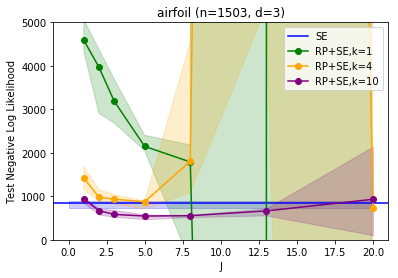

In [62]:
plt.figure()
make_plot(k=1, dataset='airfoil', plot_bl=True)
make_plot(k=4, dataset='airfoil', color='orange', plot_bl=False)
make_plot(k=10, dataset='airfoil', color='purple', plot_bl=False)
plt.legend()
plt.ylim(0, 5000)

(0, 20000)

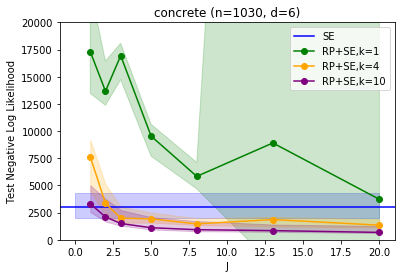

In [60]:
plt.figure()
make_plot(k=1, dataset='concrete', plot_bl=True)
make_plot(k=4, dataset='concrete', color='orange', plot_bl=False)
make_plot(k=10, dataset='concrete', color='purple', plot_bl=False)
plt.legend()
plt.ylim(0, 20000)

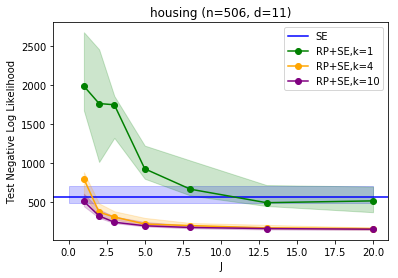

In [76]:
plt.figure()
make_plot(k=1, dataset='housing', plot_bl=True)
make_plot(k=4, dataset='housing', color='orange', plot_bl=False)
make_plot(k=10, dataset='housing', color='purple', plot_bl=False)
plt.legend()
# plt.ylim(0, 5000)

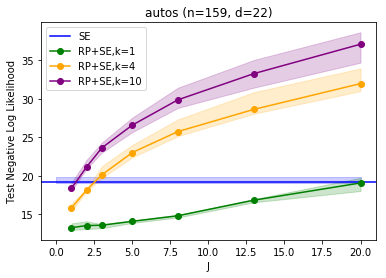

In [74]:
plt.figure()
make_plot(k=1, dataset='autos', plot_bl=True)
make_plot(k=4, dataset='autos', color='orange', plot_bl=False)
make_plot(k=10, dataset='autos', color='purple', plot_bl=False)
plt.legend()
# plt.ylim(0, 5000)

# Unfitted plots with k=1

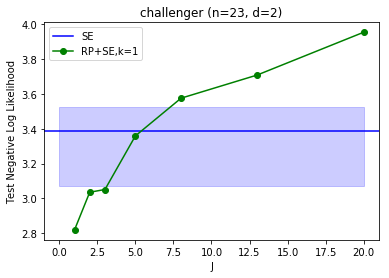

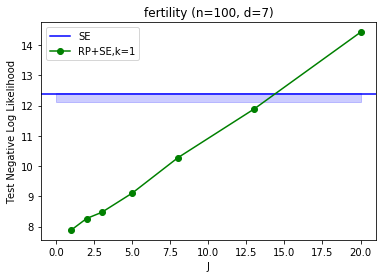

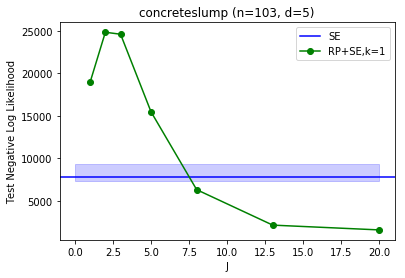

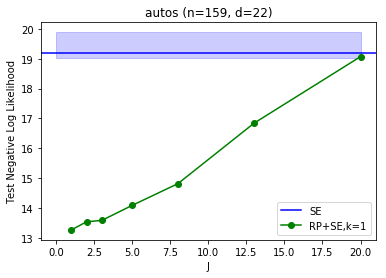

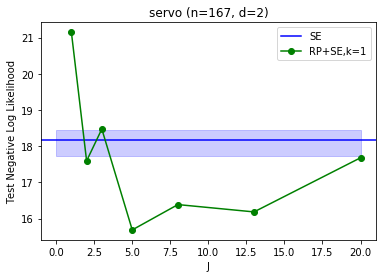

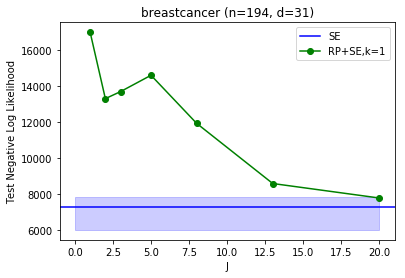

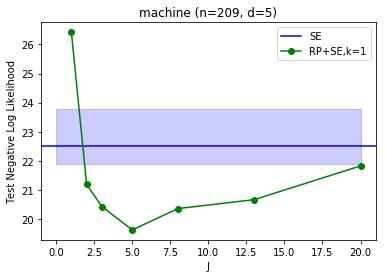

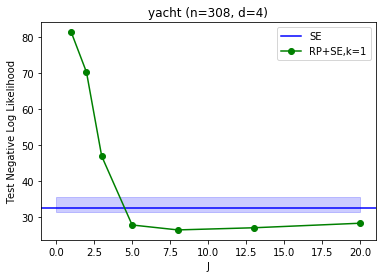

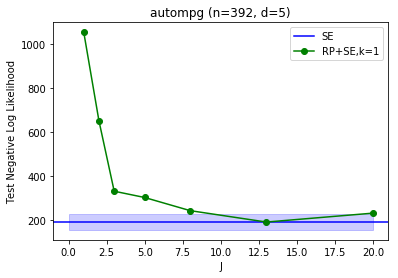

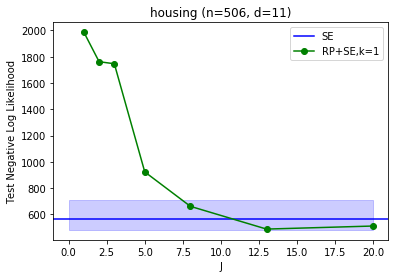

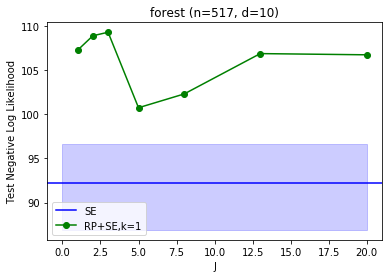

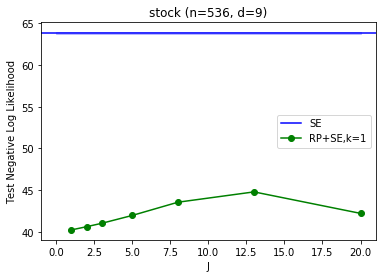

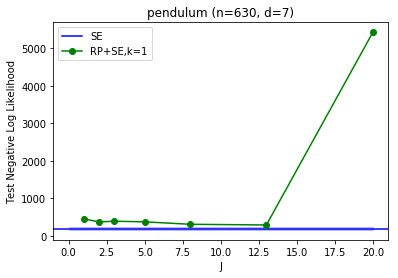

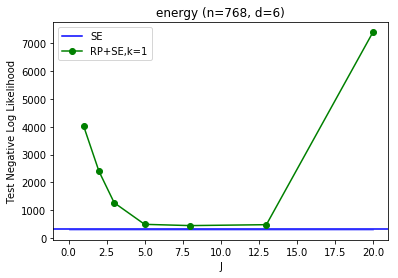

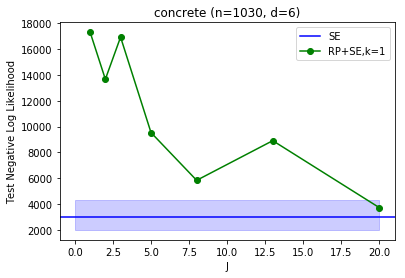

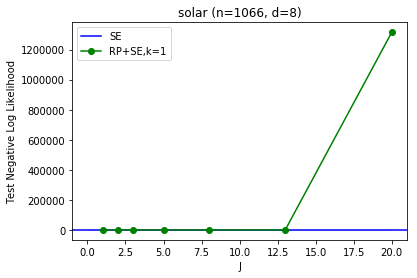

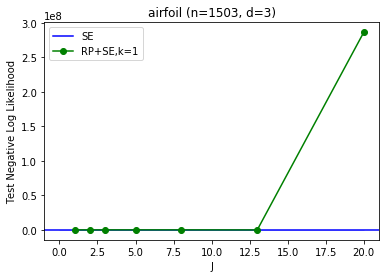

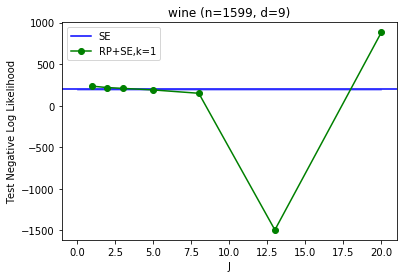

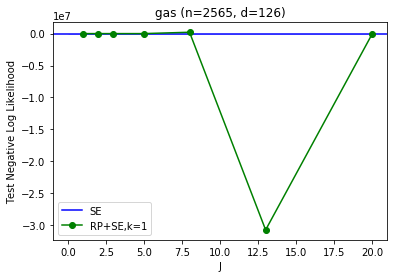

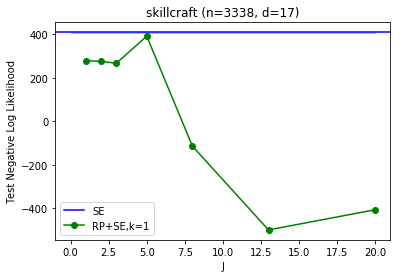

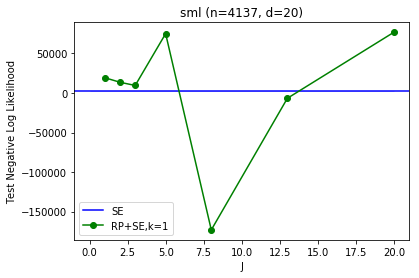

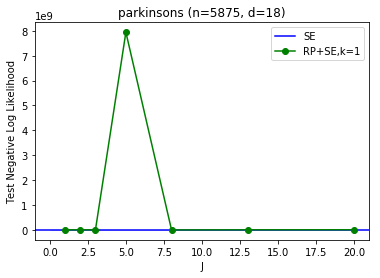

In [68]:
k = 1
for dataset in udf['dataset'].unique():
    plt.figure()
    make_plot(k, dataset, show_range=False)
    plt.legend()

# Unfitted plots with different k using NLL

/home/ian/miniconda3/envs/GPyTorchEnv2/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



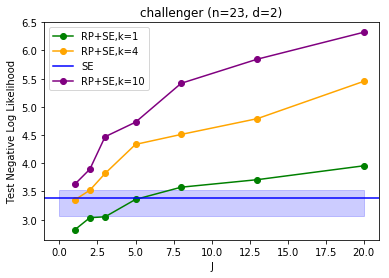

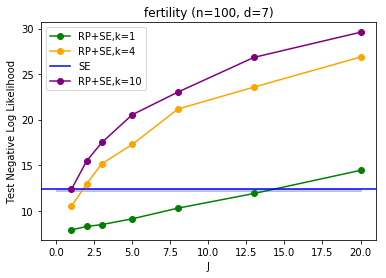

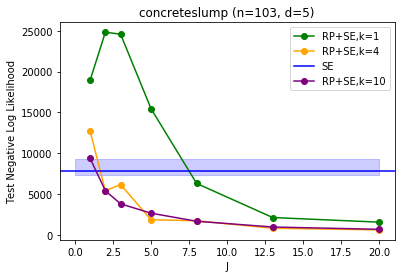

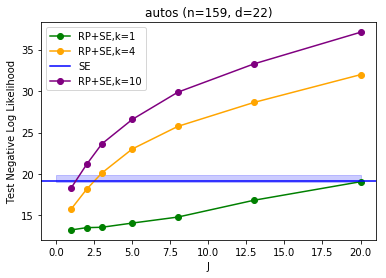

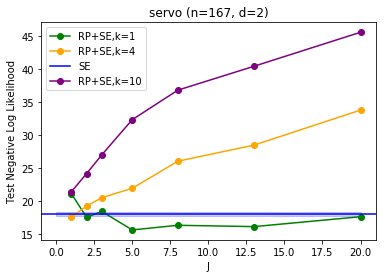

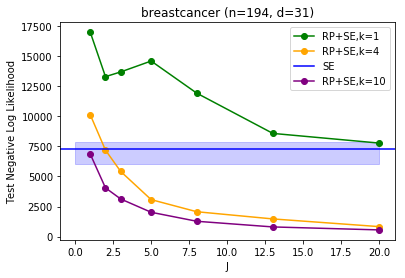

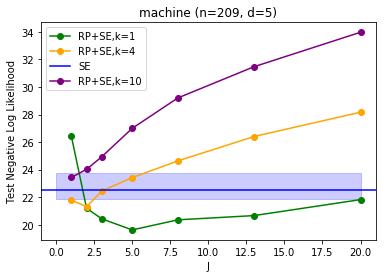

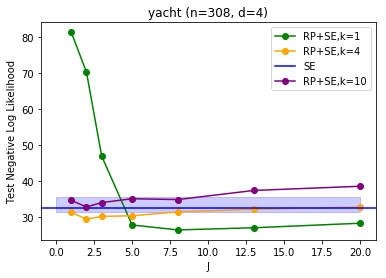

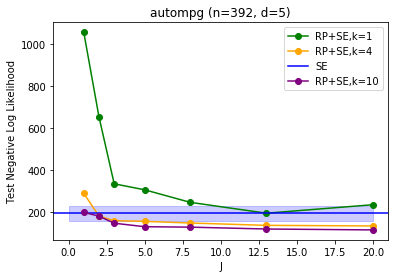

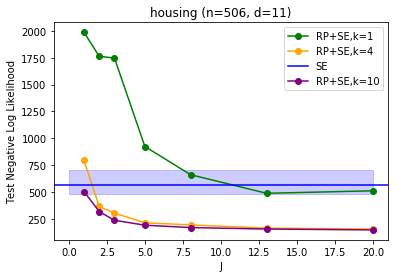

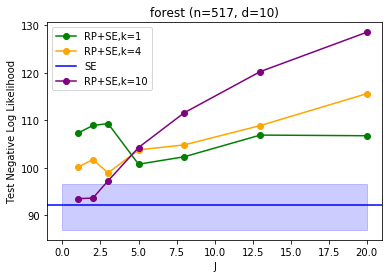

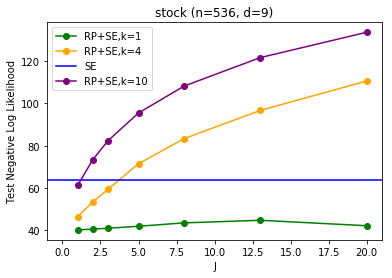

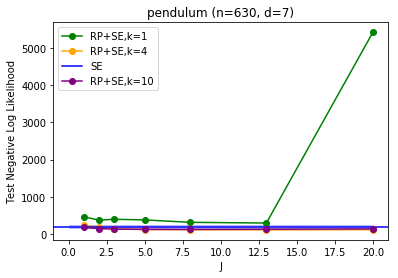

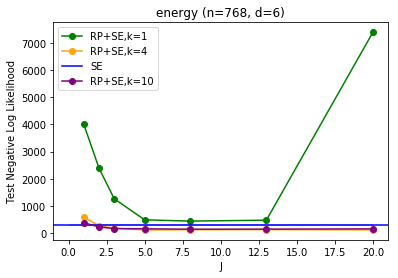

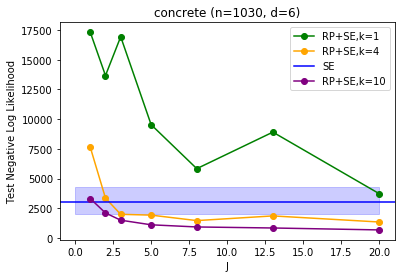

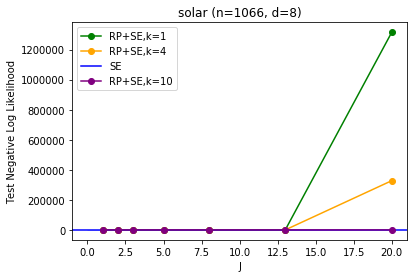

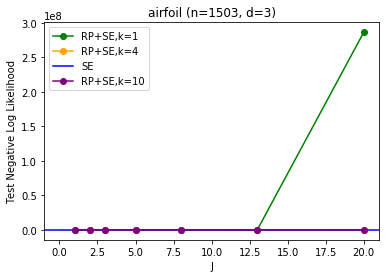

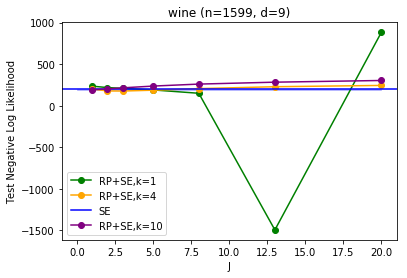

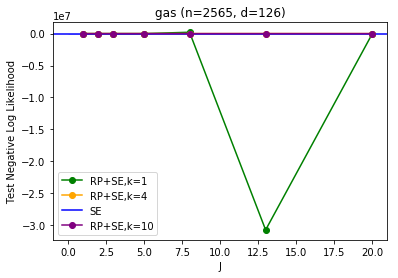

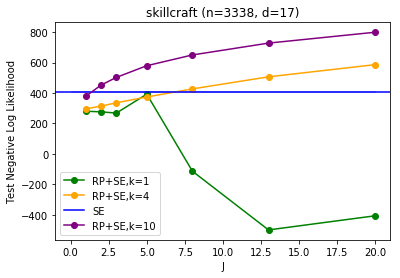

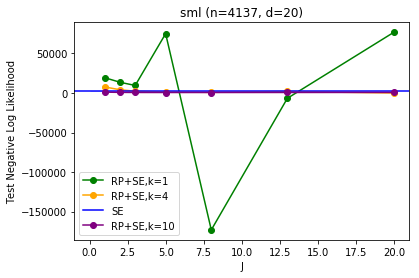

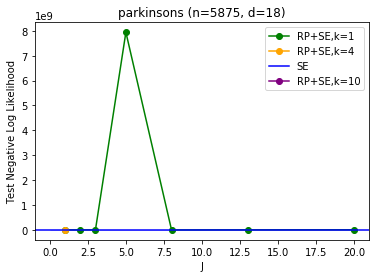

In [146]:
for dataset in udf['dataset'].unique():
    plt.figure()
    make_plot(1, dataset, show_range=False, plot_bl=False)
    make_plot(4, dataset, show_range=False, plot_bl=False, color='orange')
    make_plot(10, dataset, show_range=False, plot_bl=True, color='purple')
    plt.legend()

# Unfitted plots with different k using MSE

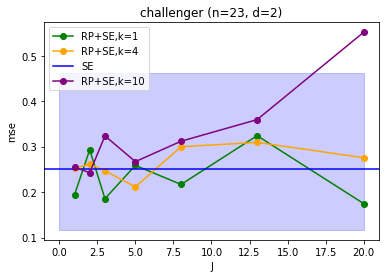

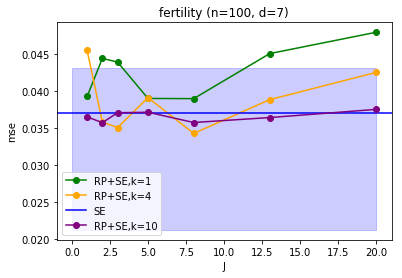

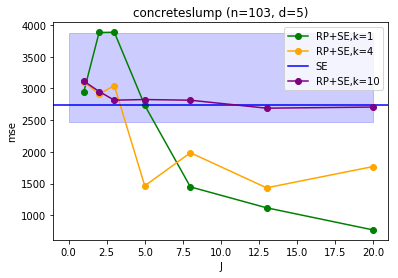

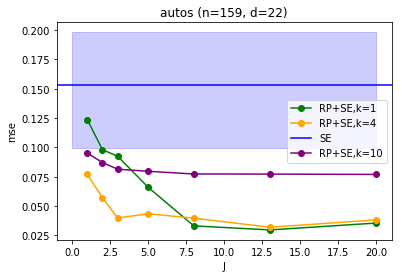

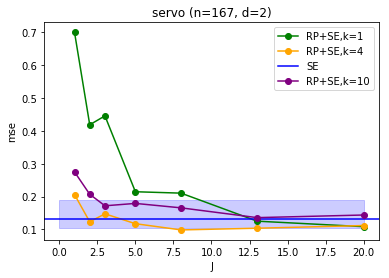

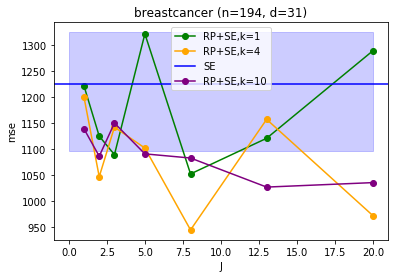

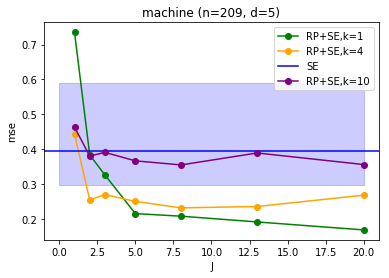

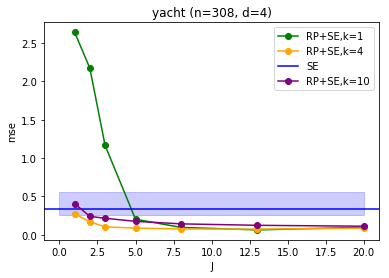

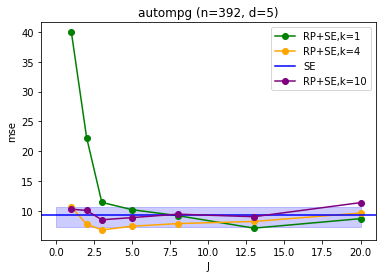

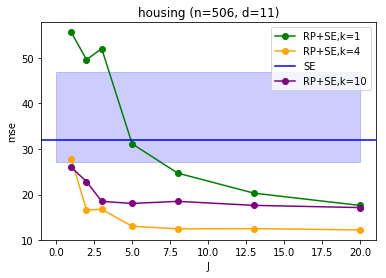

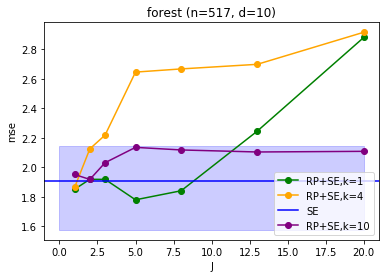

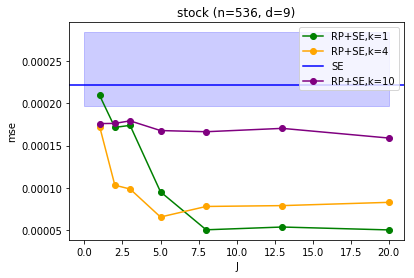

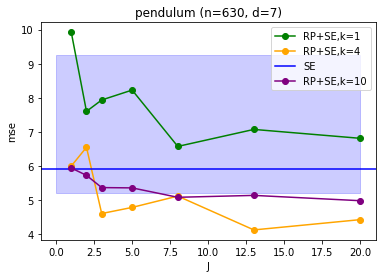

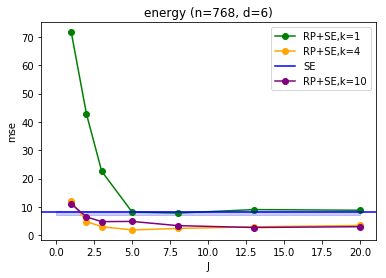

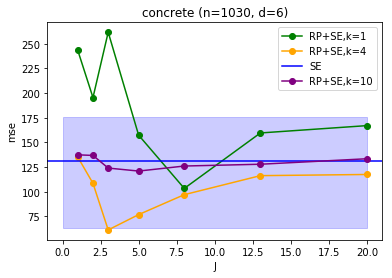

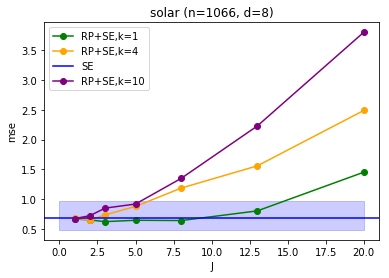

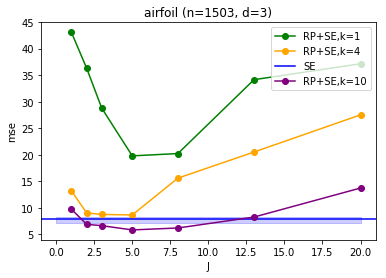

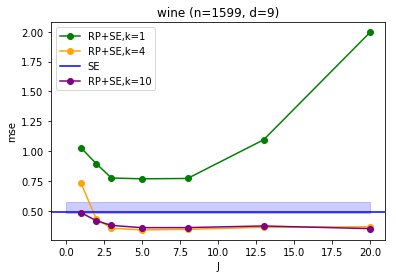

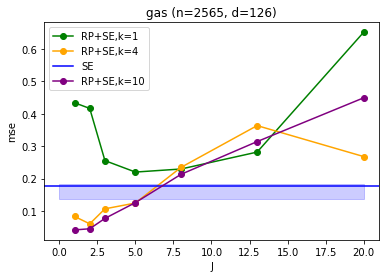

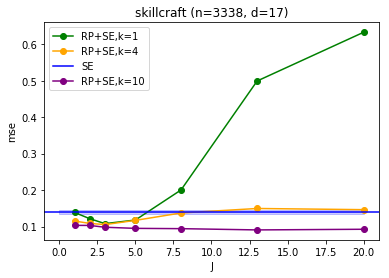

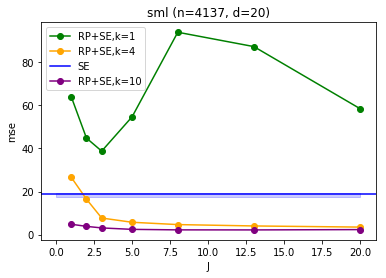

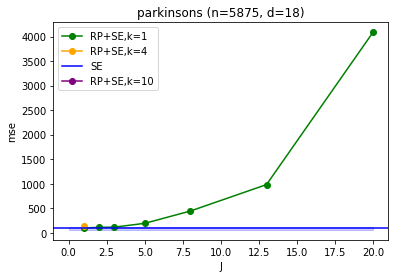

In [191]:
for dataset in udf['dataset'].unique():
    plt.figure()
    make_plot(1, dataset, show_range=False, plot_bl=False, ds=udf, metric='mse')
    make_plot(4, dataset, show_range=False, plot_bl=False, color='orange', ds=udf, metric='mse')
    make_plot(10, dataset, show_range=False, plot_bl=True, color='purple', ds=udf, metric='mse')
    plt.legend()

# Example Plots for fitted kernels

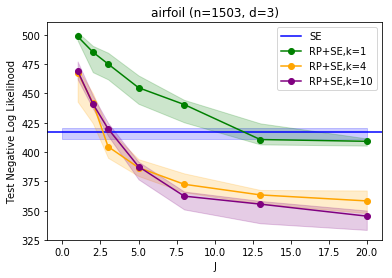

In [84]:
plt.figure()
make_plot(k=1, dataset='airfoil', plot_bl=True, fit=True)
make_plot(k=4, dataset='airfoil', color='orange', plot_bl=False, fit=True)
make_plot(k=10, dataset='airfoil', color='purple', plot_bl=False, fit=True)
plt.legend()
# plt.ylim(0, 5000)

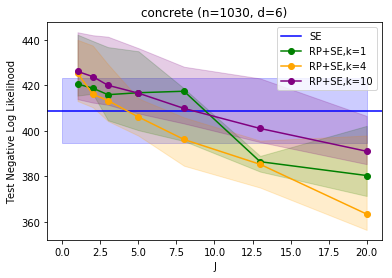

In [85]:
plt.figure()
make_plot(k=1, dataset='concrete', plot_bl=True, fit=True)
make_plot(k=4, dataset='concrete', color='orange', plot_bl=False, fit=True)
make_plot(k=10, dataset='concrete', color='purple', plot_bl=False, fit=True)
plt.legend()
# plt.ylim(0, 20000)

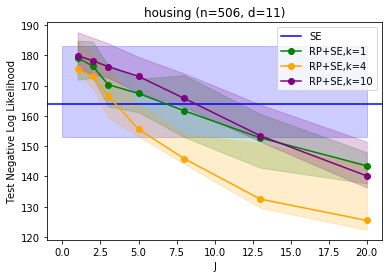

In [86]:
plt.figure()
make_plot(k=1, dataset='housing', plot_bl=True, fit=True)
make_plot(k=4, dataset='housing', color='orange', plot_bl=False, fit=True)
make_plot(k=10, dataset='housing', color='purple', plot_bl=False, fit=True)
plt.legend()
# plt.ylim(0, 5000)

(-100, 200)

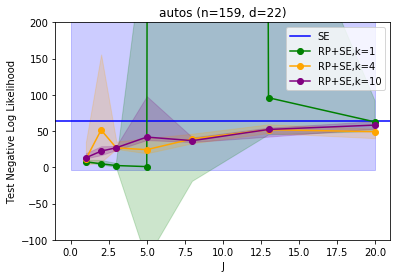

In [100]:
plt.figure()
make_plot(k=1, dataset='autos', plot_bl=True, fit=True)
make_plot(k=4, dataset='autos', color='orange', plot_bl=False, fit=True)
make_plot(k=10, dataset='autos', color='purple', plot_bl=False, fit=True)
plt.legend()
plt.ylim(-100, 200)

# Note that there are some serious problems with training, e.g. with Autos

In [104]:
fdf[(fdf['dataset'] == 'autos') & (fdf['RP']==False)]

,Unnamed: 0,J,RP,d,dataset,error,fold,k,mse,n,repeat,test_nll,test_nmll,train_nll,train_nmll,train_time
1078,0,NaN,False,22,autos,NaN,0,NaN,0.094458,159,0.0,-2.959589,-0.171190,4.320297e+03,30.166616,7.385361
1091,13,NaN,False,22,autos,NaN,2,NaN,0.084692,159,0.0,84167.867188,5260.597168,NaN,NaN,5.565307
1092,14,NaN,False,22,autos,NaN,3,NaN,0.144470,159,0.0,193.846176,11.377957,3.136273e+08,-4.906769,7.931964
1093,15,NaN,False,22,autos,NaN,4,NaN,0.326374,159,0.0,84686.164062,5292.871094,-2.534464e+06,-16584.371094,6.201168
1102,24,NaN,False,22,autos,NaN,5,NaN,0.040728,159,0.0,-4.382742,-0.243789,1.173325e+01,-0.408346,8.906313
1107,29,NaN,False,22,autos,NaN,6,NaN,0.182163,159,0.0,NaN,4.633323,NaN,NaN,8.899178
1108,30,NaN,False,22,autos,NaN,7,NaN,0.161839,159,0.0,59.556335,3.862159,NaN,NaN,6.296147
1110,32,NaN,False,22,autos,NaN,8,NaN,0.273224,159,0.0,67.426727,4.306119,NaN,NaN,7.026748
1114,36,NaN,False,22,autos,NaN,9,NaN,0.102313,159,0.0,-249.909836,-16.657291,-1.098113e+08,328712.125000,13.638186


# Fitted NLL k=1

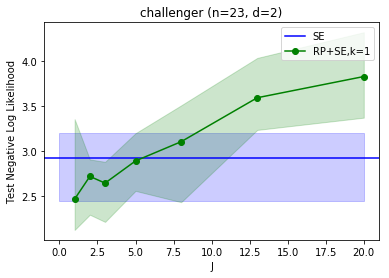

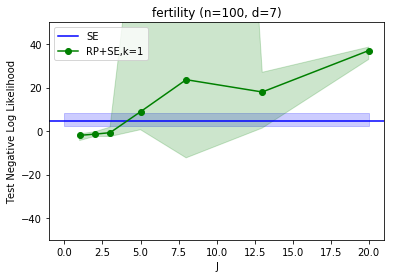

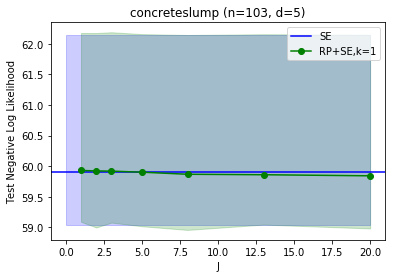

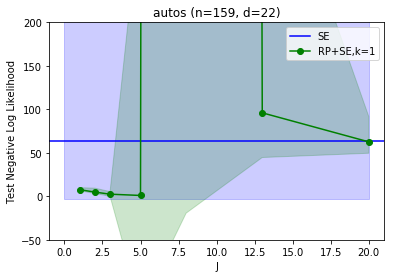

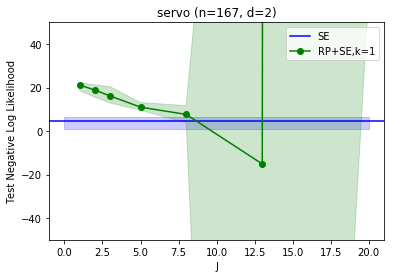

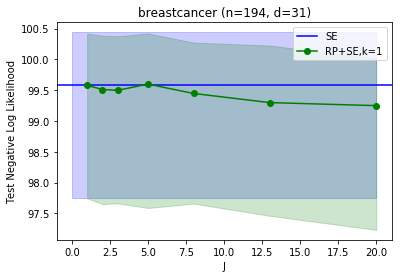

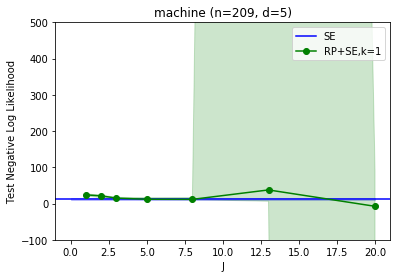

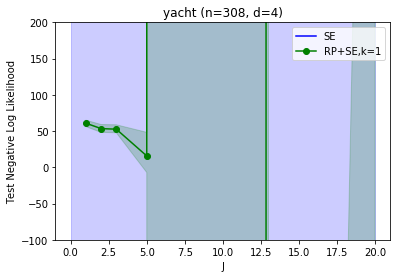

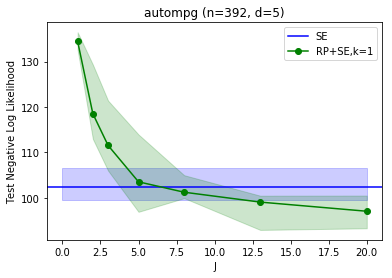

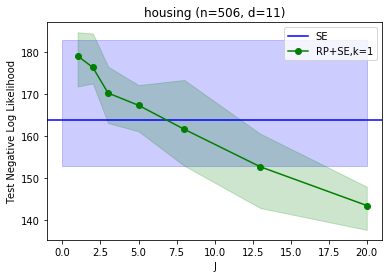

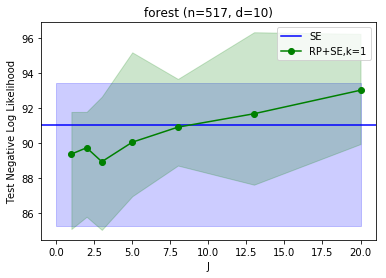

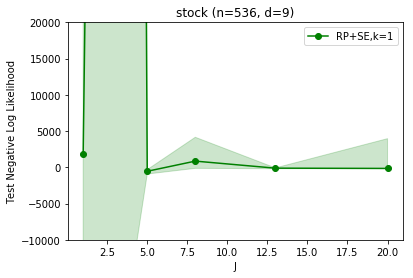

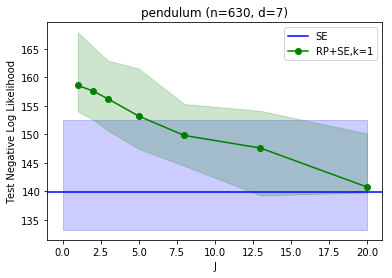

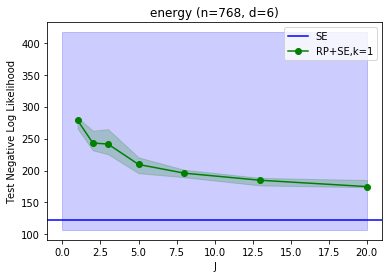

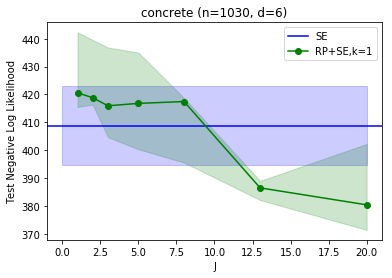

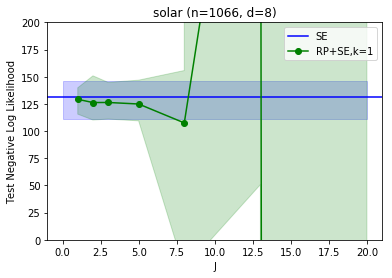

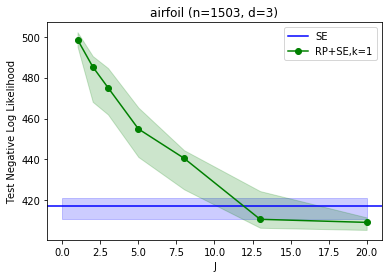

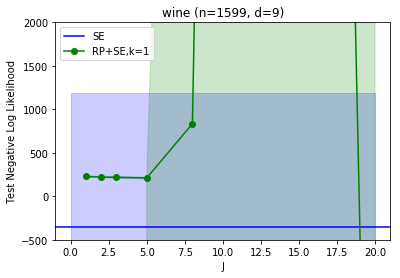

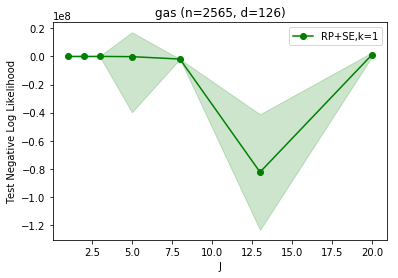

In [138]:
k = 1
maxlim_list = {
    'fertility': (-50,50),
    'autos': (-50, 200), 
    'servo': (-50, 50),
    'machine': (-100, 500),
    'yacht': (-100, 200),
    'stock': (-10000, 5000),
    'solar': (-0, 200),
    'wine': (-500, 2000)
}
for dataset in fdf['dataset'].unique():
    plt.figure()
    if dataset == 'stock' or dataset == 'gas':
        make_plot(k, dataset, show_range=True, fit=True, plot_bl=False)
    else:
        make_plot(k, dataset, show_range=True, fit=True, plot_bl=True)
    if dataset in maxlim_list.keys():
        plt.ylim(maxlim_list[dataset])
    plt.legend()

# Fitted NLL with different k

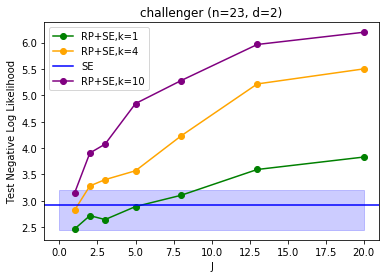

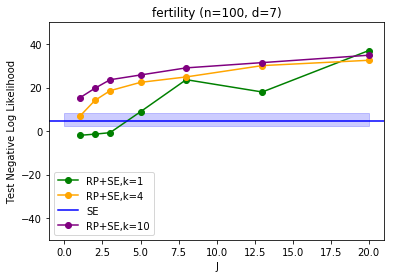

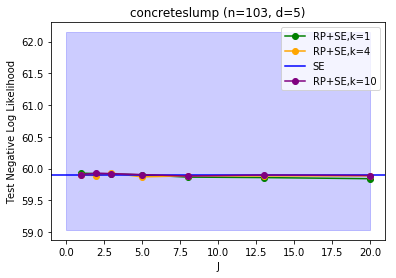

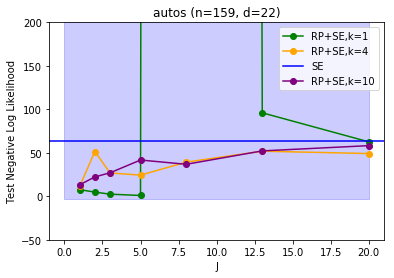

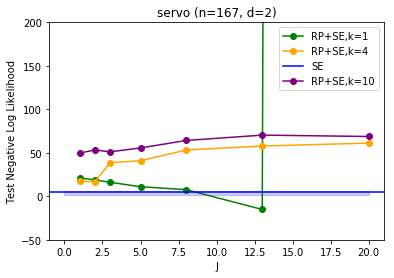

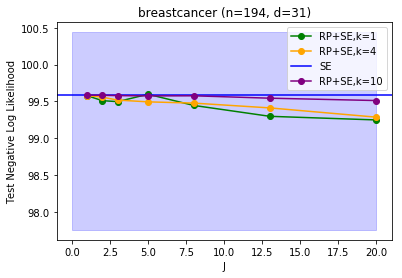

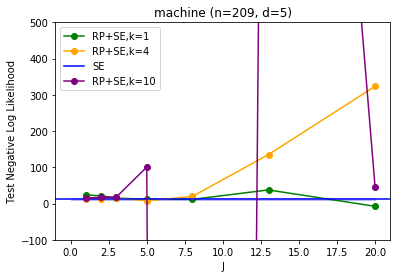

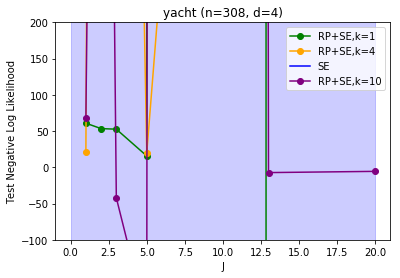

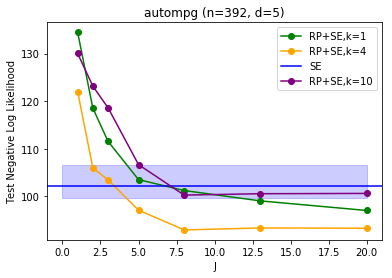

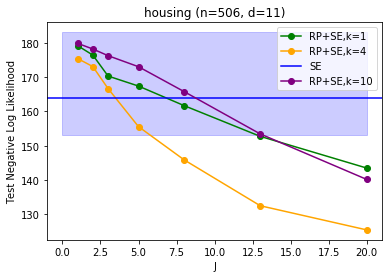

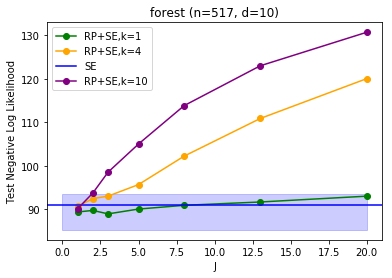

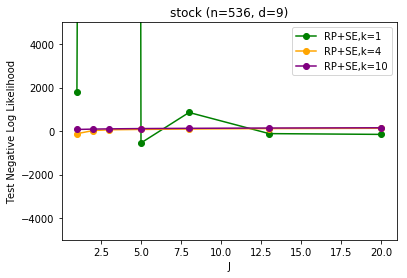

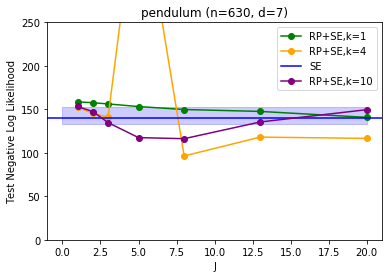

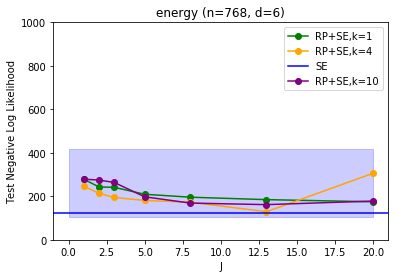

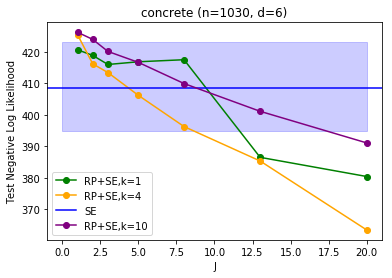

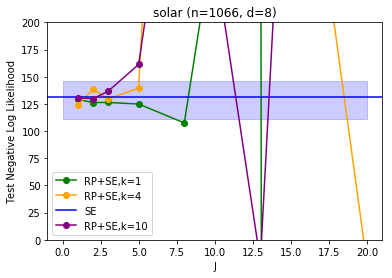

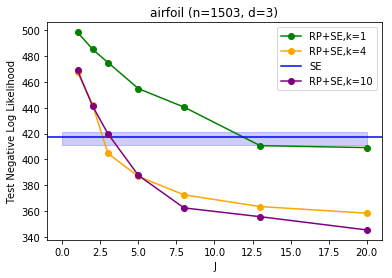

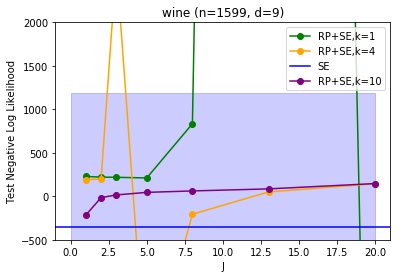

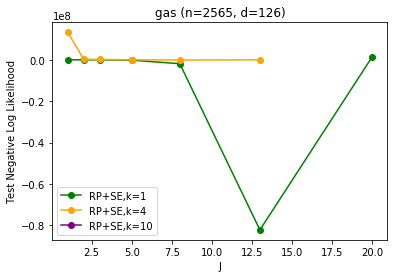

In [148]:
maxlim_list = {
    'fertility': (-50,50),
    'autos': (-50, 200), 
    'servo': (-50, 200),
    'machine': (-100, 500),
    'yacht': (-100, 200),
    'stock': (-5000, 5000),
    'solar': (-0, 200),
    'wine': (-500, 2000),
    'pendulum': (0, 250),
    'energy': (0, 1000),
}
for dataset in fdf['dataset'].unique():
    plt.figure()
    if dataset == 'stock' or dataset == 'gas':
        make_plot(1, dataset, show_range=False, fit=True, plot_bl=False)
        make_plot(4, dataset, show_range=False, fit=True, plot_bl=False, color='orange')
        make_plot(10, dataset, show_range=False, fit=True, plot_bl=False, color='purple')
    else:
        make_plot(1, dataset, show_range=False, fit=True, plot_bl=False)
        make_plot(4, dataset, show_range=False, fit=True, plot_bl=False, color='orange')
        make_plot(10, dataset, show_range=False, fit=True, plot_bl=True, color='purple')
    if dataset in maxlim_list.keys():
        plt.ylim(maxlim_list[dataset])
    plt.legend()

# Fitted mean squared errors

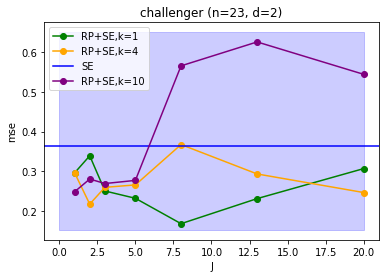

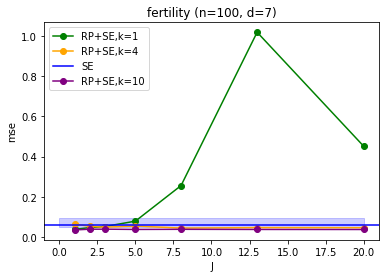

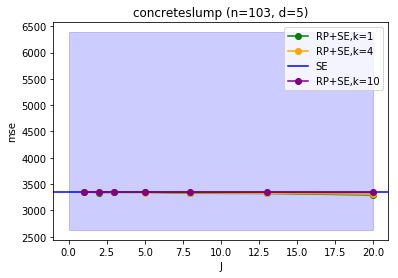

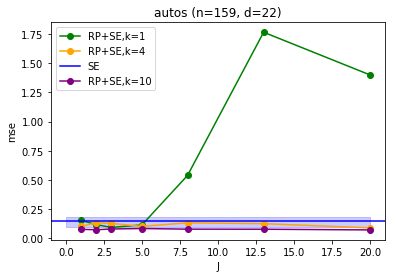

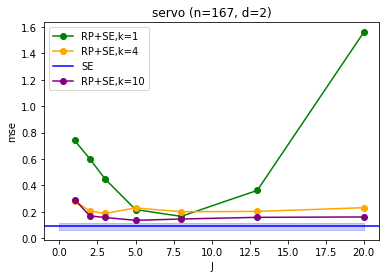

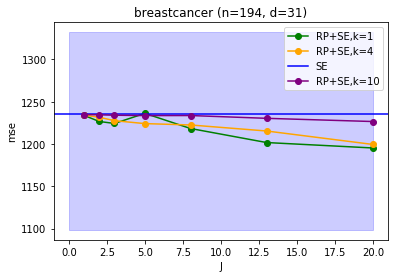

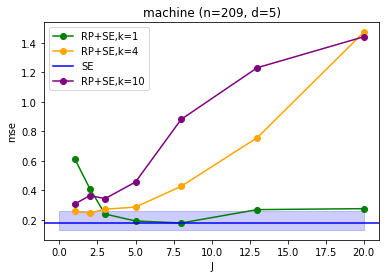

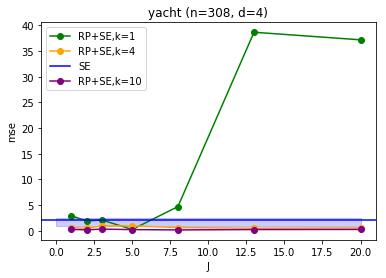

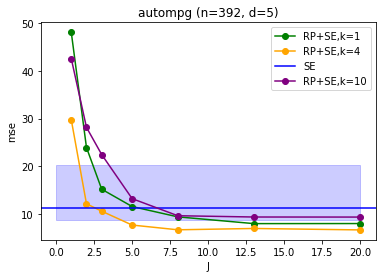

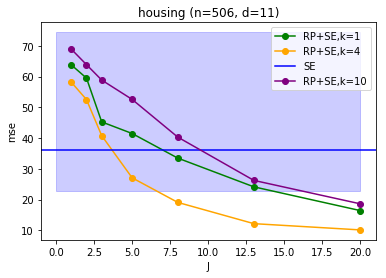

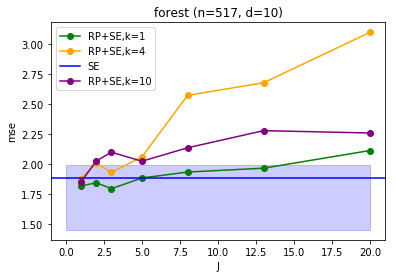

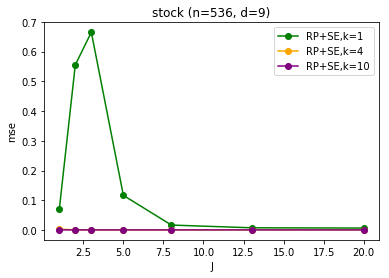

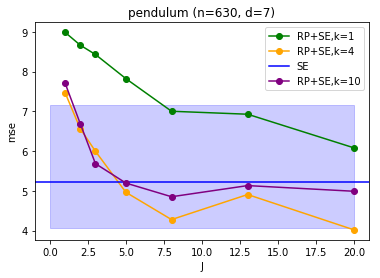

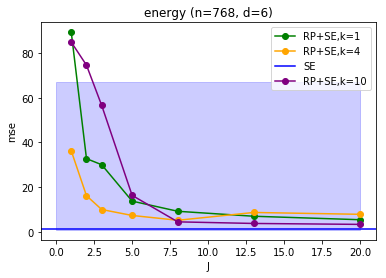

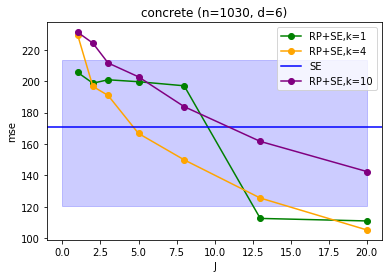

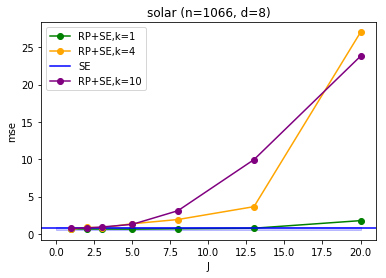

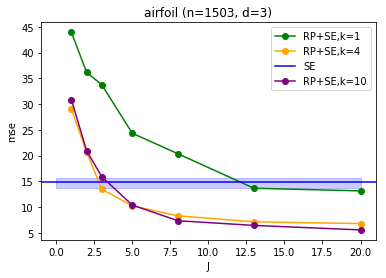

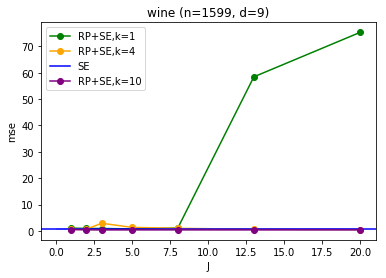

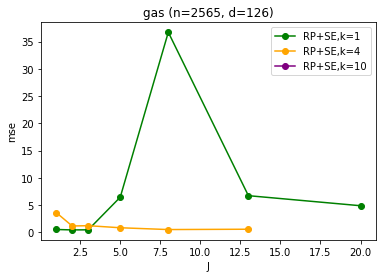

In [194]:
maxlim_list = {
    'fertility': (-50,50),
    'autos': (-50, 200), 
    'servo': (-50, 200),
    'machine': (-100, 500),
    'yacht': (-100, 200),
    'stock': (-5000, 5000),
    'solar': (-0, 200),
    'wine': (-500, 2000),
    'pendulum': (0, 250),
    'energy': (0, 1000),
}
for dataset in fdf['dataset'].unique():
    plt.figure()
    if dataset == 'stock' or dataset == 'gas':
        make_plot(1, dataset, show_range=False, ds=fdf, plot_bl=False, metric='mse')
        make_plot(4, dataset, show_range=False, ds=fdf, plot_bl=False, color='orange', metric='mse')
        make_plot(10, dataset, show_range=False, ds=fdf, plot_bl=False, color='purple', metric='mse')
    else:
        make_plot(1, dataset, show_range=False, ds=fdf, plot_bl=False, metric='mse')
        make_plot(4, dataset, show_range=False, ds=fdf, plot_bl=False, color='orange', metric='mse')
        make_plot(10, dataset, show_range=False, ds=fdf, plot_bl=True, color='purple', metric='mse')
#     if dataset in maxlim_list.keys():
#         plt.ylim(maxlim_list[dataset])
    plt.legend()

# Plotting scaled versions

In [195]:
rfdf = pd.read_csv('./fitted_scaled_rp_compare_ablation_results.csv')
rfdf = rfdf.dropna(axis=0, how='all', subset=['test_nll'])
rfdf.groupby(('dataset'))['train_time'].count()

dataset
autos            220
breastcancer     211
challenger       175
concreteslump    122
fertility        219
machine          220
servo            193
yacht             76
Name: train_time, dtype: int64

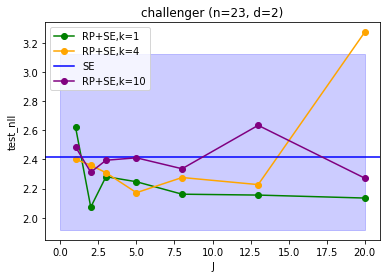

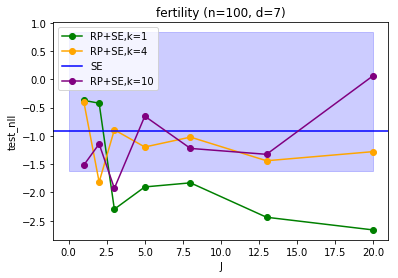

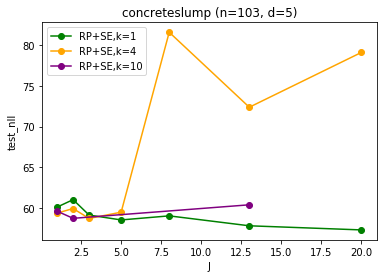

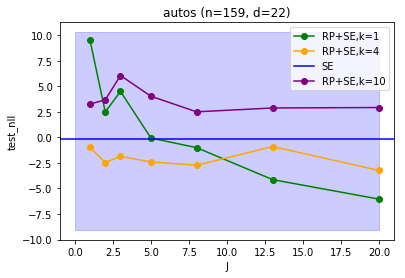

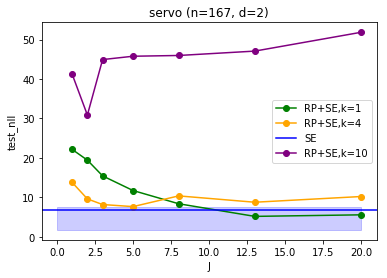

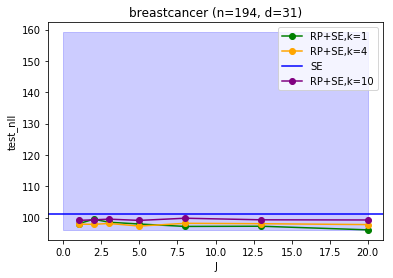

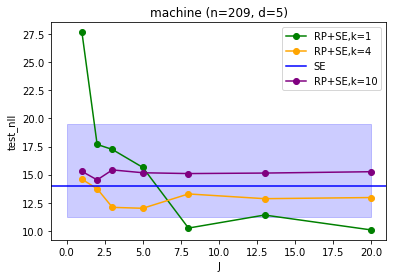

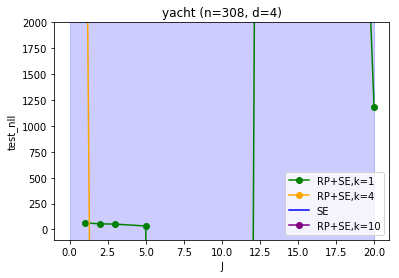

In [199]:
maxlim_list = {
#     'fertility': (-5,2),
#     'autos': (-50, 200), 
#     'servo': (-50, 200),
#     'machine': (-100, 500),
    'yacht': (-100, 2000),
    'stock': (-5000, 5000),
    'solar': (-0, 200),
    'wine': (-500, 2000),
    'pendulum': (0, 250),
    'energy': (0, 1000),
}
for dataset in rfdf['dataset'].unique():
    plt.figure()
    if dataset == 'concreteslump':
        make_plot(1, dataset, show_range=False, ds=rfdf, plot_bl=False)
        make_plot(4, dataset, show_range=False,  ds=rfdf, plot_bl=False, color='orange')
        make_plot(10, dataset, show_range=False,  ds=rfdf, plot_bl=False, color='purple')
    else:
        make_plot(1, dataset, show_range=False,  ds=rfdf, plot_bl=False)
        make_plot(4, dataset, show_range=False,  ds=rfdf, plot_bl=False, color='orange')
        make_plot(10, dataset, show_range=False,  ds=rfdf, plot_bl=True, color='purple')
    if dataset in maxlim_list.keys():
        plt.ylim(maxlim_list[dataset])
    plt.legend()

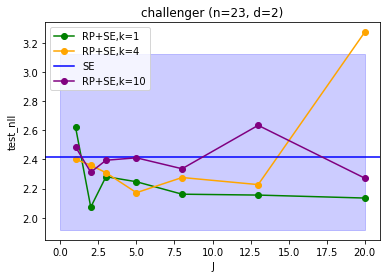

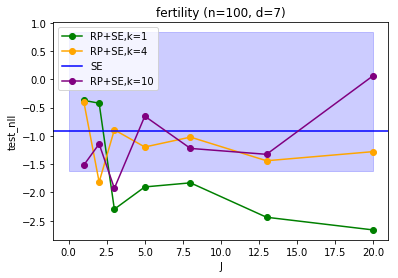

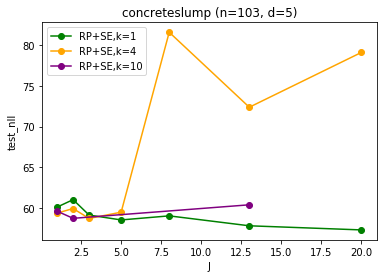

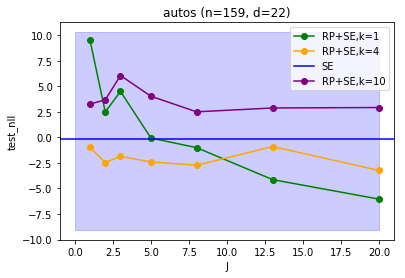

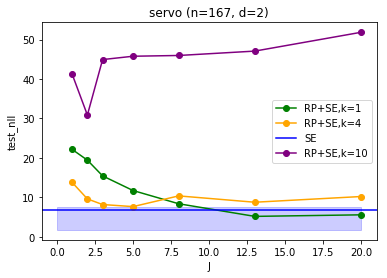

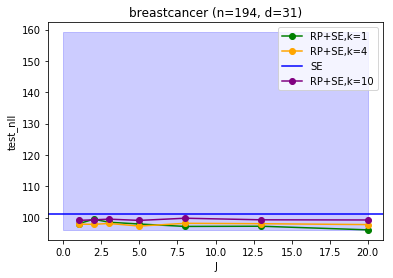

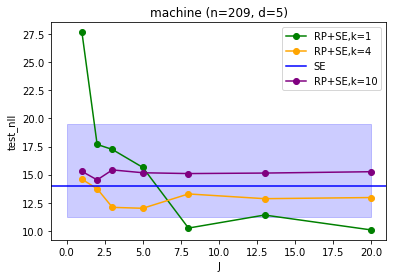

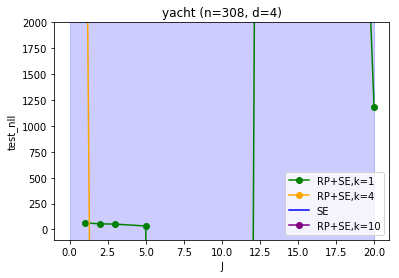

In [199]:
maxlim_list = {
#     'fertility': (-5,2),
#     'autos': (-50, 200), 
#     'servo': (-50, 200),
#     'machine': (-100, 500),
    'yacht': (-100, 2000),
    'stock': (-5000, 5000),
    'solar': (-0, 200),
    'wine': (-500, 2000),
    'pendulum': (0, 250),
    'energy': (0, 1000),
}
for dataset in rfdf['dataset'].unique():
    plt.figure()
    if dataset == 'concreteslump':
        make_plot(1, dataset, show_range=False, ds=rfdf, plot_bl=False)
        make_plot(4, dataset, show_range=False,  ds=rfdf, plot_bl=False, color='orange')
        make_plot(10, dataset, show_range=False,  ds=rfdf, plot_bl=False, color='purple')
    else:
        make_plot(1, dataset, show_range=False,  ds=rfdf, plot_bl=False)
        make_plot(4, dataset, show_range=False,  ds=rfdf, plot_bl=False, color='orange')
        make_plot(10, dataset, show_range=False,  ds=rfdf, plot_bl=True, color='purple')
    if dataset in maxlim_list.keys():
        plt.ylim(maxlim_list[dataset])
    plt.legend()

# TODO
 * Debug fitting of models (errors + unreasonably large NLL + negative NMLL)
 * Finish re-running tests with fitted scale parameter
 * Run a baseline of Linear Regression (and ELM's?)
 * ??

In [202]:
rfdf[rfdf['dataset'] == 'autos'].groupby(('k', 'J'))['train_nmll'].median()

/home/ian/miniconda3/envs/GPyTorchEnv2/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:

Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.



k     J   
1.0   1.0     0.521215
      2.0     0.204600
      3.0     0.092124
      5.0    -0.169094
      8.0    -0.457627
      13.0   -0.690162
      20.0   -0.781876
4.0   1.0    -0.539996
      2.0    -0.880911
      3.0    -0.898194
      5.0    -0.960328
      8.0    -0.976618
      13.0   -0.945193
      20.0   -0.943476
10.0  1.0    -0.887621
      2.0    -0.825490
      3.0    -0.842680
      5.0    -0.811734
      8.0    -0.858593
      13.0   -0.874354
      20.0   -0.873768
Name: train_nmll, dtype: float64

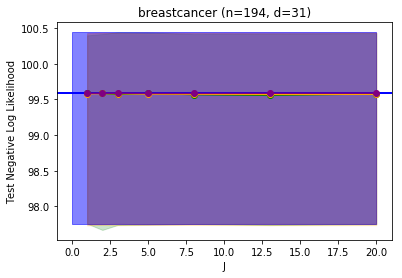

In [185]:
breast_results = pd.read_csv('./breastcancer_fitted_scaled_rp_compare_ablation_results.csv')
make_plot(k=1, dataset='breastcancer', color='green', plot_bl=True, show_range=True, ds=breast_results)
make_plot(k=4, dataset='breastcancer', color='orange', plot_bl=True, show_range=True, ds=breast_results)
make_plot(k=10, dataset='breastcancer', color='purple', plot_bl=True, show_range=True, ds=breast_results)

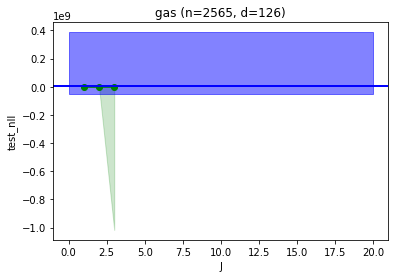

In [200]:
gas_results = pd.read_csv('./gas_fitted_scaled_rp_compare_ablation_results.csv')
make_plot(k=1, dataset='gas', color='green', plot_bl=True, show_range=True, ds=gas_results)
make_plot(k=4, dataset='gas', color='orange', plot_bl=True, show_range=True, ds=gas_results)
make_plot(k=10, dataset='gas', color='purple', plot_bl=True, show_range=True, ds=gas_results)